# Lake model continued

In the previous week you used the lake problem as a means of getting aquinted with the workbench. In this assignment we will continue with the lake problem, focussing explicitly on using it for open exploration. You can use the second part of [this tutoria](https://emaworkbench.readthedocs.io/en/latest/indepth_tutorial/open-exploration.html) for help.

**It is paramount that you are using the lake problem with 100 decision variables, rather than the one found on the website with the seperate anthropogenic release decision**

## Apply sensitivity analysis
There is substantial support in the ema_workbench for global sensitivity. For this, the workbench relies on [SALib](https://salib.readthedocs.io/en/latest/) and feature scoring which is a machine learning alternative for global sensitivity analysis. 


1. Apply Sobol with 3 seperate release policies (0, 0.05, and 0.1) and analyse the results for each release policy seperately focusing on the reliability objective. Do the sensitivities change depending on the release policy? Can you explain why or why not?

*hint: you can use sobol sampling for the uncertainties, and set policies to a list with the 3 different release policies. Next, for the analysis using logical indexing on the experiment.policy column you can select the results for each seperate release policy and apply sobol to each of the three seperate release policies. If this sounds too complicated, just do it on each release policy seperately.*



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lakemodel_function import lake_problem as lake_model

from scipy.integrate import odeint
from ema_workbench import Model, RealParameter, TimeSeriesOutcome, ScalarOutcome, Policy

model = Model('LAKEMODEL', function=lake_model)

model.uncertainties = [RealParameter('b', 0.1, 0.45),
                       RealParameter('mean', 0.01, 0.05),
                       RealParameter('q', 2, 4.5),
                       RealParameter("stdev", 0.001, 0.005),
                       RealParameter('delta', 0.93, 0.99)]

model.levers = [RealParameter(f'l{i}', 0,0.1) for i in range(100)]


model.outcomes = [ScalarOutcome('max_P'),
                  ScalarOutcome('utility'),
                  ScalarOutcome('inertia'),
                  ScalarOutcome('reliability')]

C:\Users\teres\Anaconda3\lib\site-packages\ema_workbench\em_framework\evaluators.py:22: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  'ipyparallel not installed - IpyparalleEvaluator not available')
C:\Users\teres\Anaconda3\lib\site-packages\ema_workbench\em_framework\optimization.py:48: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)


In [3]:
policies = [Policy('0', **{l.name: 0 for l in model.levers }), 
            Policy('0.05', **{l.name: 0.05 for l in model.levers }),
            Policy('0.1', **{l.name: 0.1 for l in model.levers })]

### Policy = 0

In [4]:
from SALib.analyze import sobol
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from ema_workbench import (MultiprocessingEvaluator, SequentialEvaluator ,ema_logging,
                           perform_experiments)

ema_logging.log_to_stderr(ema_logging.INFO)

with SequentialEvaluator(model) as evaluator:
    sa_results = evaluator.perform_experiments(scenarios = 50 ,
                                               uncertainty_sampling='sobol', policies= policies[0])


[MainProcess/INFO] performing 600 scenarios * 1 policies * 1 model(s) = 600 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 60 cases completed
[MainProcess/INFO] 120 cases completed
[MainProcess/INFO] 180 cases completed
[MainProcess/INFO] 240 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 360 cases completed
[MainProcess/INFO] 420 cases completed
[MainProcess/INFO] 480 cases completed
[MainProcess/INFO] 540 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] experiments finished


In [5]:
experiments, outcomes = sa_results

problem_1 = get_SALib_problem(model.uncertainties)
Si_1 = sobol.analyze(problem_1, outcomes['reliability'],
                   calc_second_order=True, print_to_console=False)

In [6]:
Si_filter_1 = {k:Si_1[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df_1 = pd.DataFrame(Si_filter_1, index = problem_1['names'])
Si_df_1

,ST,ST_conf,S1,S1_conf
b,0.660744,0.327565,0.382821,0.432710
delta,0.000003,0.000006,-0.000075,0.000426
mean,0.294193,0.229141,0.251563,0.300009
q,0.486234,0.240391,0.405342,0.358923
stdev,0.000001,0.000001,-0.000287,0.000473


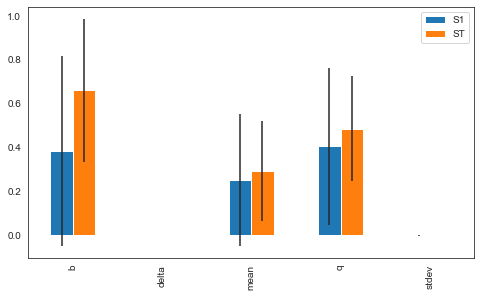

In [7]:
import seaborn as sns

sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df_1[['S1','ST']]
err = Si_df_1[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(8,6)
fig.subplots_adjust(bottom=0.3)
plt.show()

### Policy = 0.05

In [62]:
from SALib.analyze import sobol
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from ema_workbench import (MultiprocessingEvaluator, SequentialEvaluator ,ema_logging,
                           perform_experiments)

ema_logging.log_to_stderr(ema_logging.INFO)

with SequentialEvaluator(model) as evaluator:
    sa_results_2 = evaluator.perform_experiments(scenarios = 50 ,
                                               uncertainty_sampling='sobol', policies= policies[1])

[MainProcess/INFO] performing 600 scenarios * 1 policies * 1 model(s) = 600 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 60 cases completed
[MainProcess/INFO] 120 cases completed
[MainProcess/INFO] 180 cases completed
[MainProcess/INFO] 240 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 360 cases completed
[MainProcess/INFO] 420 cases completed
[MainProcess/INFO] 480 cases completed
[MainProcess/INFO] 540 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] experiments finished


In [63]:
experiments_2, outcomes_2 = sa_results_2

problem_2 = get_SALib_problem(model.uncertainties)
Si_2 = sobol.analyze(problem_2, outcomes_2['reliability'],
                   calc_second_order=True, print_to_console=False)

In [64]:
Si_filter_2 = {k:Si_2[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df_2 = pd.DataFrame(Si_filter_2, index = problem_2['names'])
Si_df_2

,ST,ST_conf,S1,S1_conf
b,0.765774,0.291738,0.640666,0.292203
delta,0.000017,0.000018,0.000717,0.001606
mean,0.183726,0.110547,0.151375,0.183042
q,0.570259,0.255121,0.361911,0.301211
stdev,0.000056,0.000063,0.001565,0.002281


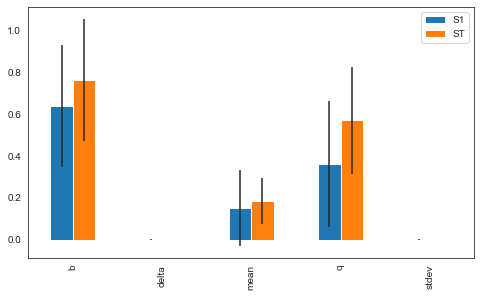

In [65]:
sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df_2[['S1','ST']]
err = Si_df_2[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(8,6)
fig.subplots_adjust(bottom=0.3)
plt.show()

### Policy = 0.1

In [12]:
from SALib.analyze import sobol
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from ema_workbench import (MultiprocessingEvaluator, SequentialEvaluator ,ema_logging,
                           perform_experiments)

ema_logging.log_to_stderr(ema_logging.INFO)

with SequentialEvaluator(model) as evaluator:
    sa_results_3 = evaluator.perform_experiments(scenarios = 50 ,
                                               uncertainty_sampling='sobol', policies= policies[2])

[MainProcess/INFO] performing 600 scenarios * 1 policies * 1 model(s) = 600 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 60 cases completed
[MainProcess/INFO] 120 cases completed
[MainProcess/INFO] 180 cases completed
[MainProcess/INFO] 240 cases completed
[MainProcess/INFO] 300 cases completed
[MainProcess/INFO] 360 cases completed
[MainProcess/INFO] 420 cases completed
[MainProcess/INFO] 480 cases completed
[MainProcess/INFO] 540 cases completed
[MainProcess/INFO] 600 cases completed
[MainProcess/INFO] experiments finished


In [16]:
experiments_3, outcomes_3 = sa_results_3

problem_3 = get_SALib_problem(model.uncertainties)
Si_3 = sobol.analyze(problem_3, outcomes_3['reliability'],
                   calc_second_order=True, print_to_console=False)

In [17]:
Si_filter_3 = {k:Si_3[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df_3 = pd.DataFrame(Si_filter_3, index = problem_3['names'])
Si_df_3

,ST,ST_conf,S1,S1_conf
b,1.221915,0.872888,0.348337,0.450083
delta,0.000004,0.000008,-0.000430,0.000636
mean,0.023575,0.050270,0.016336,0.033283
q,0.590614,1.080121,0.073623,0.159253
stdev,0.000008,0.000015,0.000068,0.000909


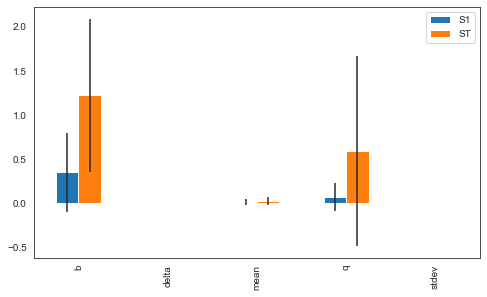

In [18]:
sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df_3[['S1','ST']]
err = Si_df_3[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(8,6)
fig.subplots_adjust(bottom=0.3)
plt.show()

2. Repeat the above analysis for the 3 release policies but now with extra trees feature scoring and for all outcomes of interest.

*hint: you can use [seaborn heatmaps](https://seaborn.pydata.org/generated/seaborn.heatmap.html) for a nice figure of the results*


## Extra-trees
### (policy = 0 )

Use the date above when policy = 0

In [78]:
x0 = experiments.loc[:, ["b","delta","mean","q", "stdev"]]
y0 = outcomes

In [79]:
from ema_workbench.analysis import feature_scoring

scores = feature_scoring.get_feature_scores_all(x0,y0)

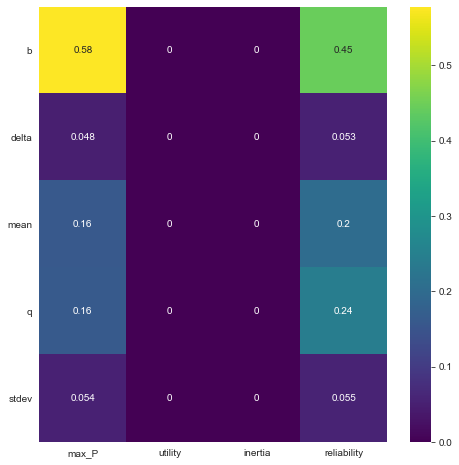

In [80]:
ax = sns.heatmap(scores, cmap='viridis', annot=True)

ax.set_aspect('equal')
fig = plt.gcf()
fig.set_size_inches(8,8)

plt.yticks(rotation=0)

plt.show()

### policy= 0.05

Use the code and results above when policy = 0.05

In [67]:
experiments_2.head(5)

,b,delta,mean,q,stdev,l0,l1,l2,l3,l4,...,l93,l94,l95,l96,l97,l98,l99,scenario,policy,model
0,0.176904,0.935801,0.030742,3.691895,0.002121,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,2450,0.05,LAKEMODEL
1,0.417529,0.935801,0.030742,3.691895,0.002121,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,2451,0.05,LAKEMODEL
2,0.176904,0.932754,0.030742,3.691895,0.002121,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,2452,0.05,LAKEMODEL
3,0.176904,0.935801,0.045977,3.691895,0.002121,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,2453,0.05,LAKEMODEL
4,0.176904,0.935801,0.030742,3.252441,0.002121,0.05,0.05,0.05,0.05,0.05,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,2454,0.05,LAKEMODEL


In [73]:
x1 = experiments_2.loc[:, ["b","delta","mean","q", "stdev"]]
y1 = outcomes_2

In [74]:
from ema_workbench.analysis import feature_scoring

scores1 = feature_scoring.get_feature_scores_all(x1,y1)

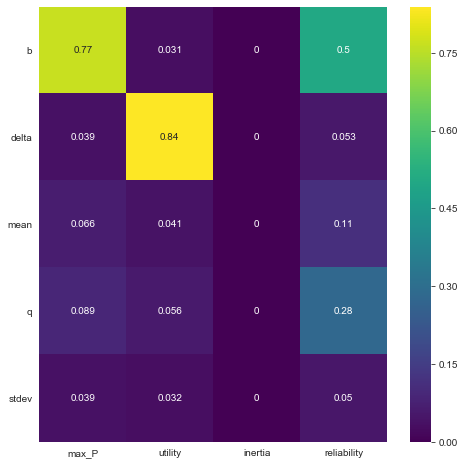

In [75]:
ax = sns.heatmap(scores1, cmap='viridis', annot=True)

ax.set_aspect('equal')
fig = plt.gcf()
fig.set_size_inches(8,8)

plt.yticks(rotation=0)

plt.show()

### policy = 0.1

In [76]:
x2 = experiments_3.loc[:, ["b","delta","mean","q", "stdev"]]
y2 = outcomes_3

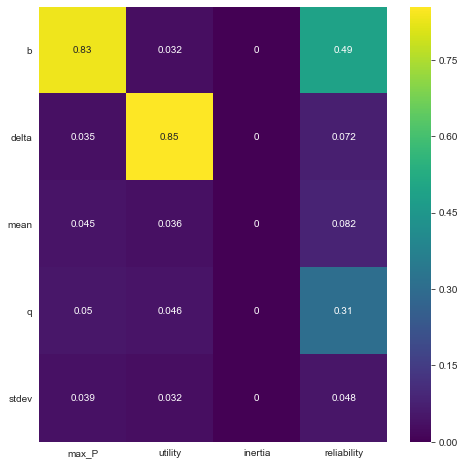

In [77]:
from ema_workbench.analysis import feature_scoring

scores2 = feature_scoring.get_feature_scores_all(x2,y2)

ax = sns.heatmap(scores2, cmap='viridis', annot=True)

ax.set_aspect('equal')
fig = plt.gcf()
fig.set_size_inches(8,8)

plt.yticks(rotation=0)

plt.show()

max_P is senstive with b, while utility is influenced most by delta

## sobol sampling vs latin hypercube sampling
As a bonus, use the sobol experiment results as input for extra trees, and compare the results with those resulting from latin hypercube sampling.

#### results of sobol sampling

In [42]:
from SALib.analyze import sobol
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from ema_workbench import (MultiprocessingEvaluator, SequentialEvaluator ,ema_logging,
                           perform_experiments)

ema_logging.log_to_stderr(ema_logging.INFO)

with SequentialEvaluator(model) as evaluator:
    sa_results_sobol = evaluator.perform_experiments(scenarios = 50 ,
                                               uncertainty_sampling='sobol', policies= policies)

[MainProcess/INFO] performing 600 scenarios * 3 policies * 1 model(s) = 1800 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 180 cases completed
[MainProcess/INFO] 360 cases completed
[MainProcess/INFO] 540 cases completed
[MainProcess/INFO] 720 cases completed
[MainProcess/INFO] 900 cases completed
[MainProcess/INFO] 1080 cases completed
[MainProcess/INFO] 1260 cases completed
[MainProcess/INFO] 1440 cases completed
[MainProcess/INFO] 1620 cases completed
[MainProcess/INFO] 1800 cases completed
[MainProcess/INFO] experiments finished


In [81]:
experiments_sobol, outcomes_sobol = sa_results_sobol

x_sobol = experiments_sobol.loc[:, ["b","delta","mean","q", "stdev", "policy"]]
y_sobol = outcomes_sobol

In [82]:
scores_sobol = feature_scoring.get_feature_scores_all(x_sobol,y_sobol)

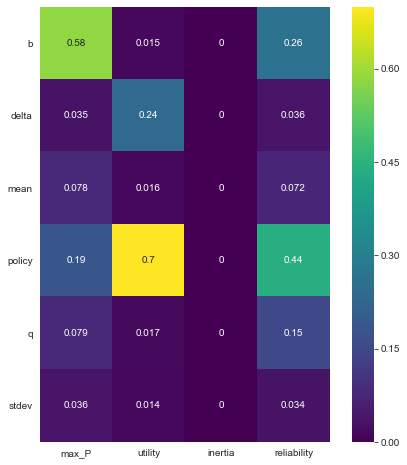

In [83]:
ax = sns.heatmap(scores_sobol, cmap='viridis', annot=True)

ax.set_aspect('equal')
fig = plt.gcf()
fig.set_size_inches(8,8)

plt.yticks(rotation=0)

plt.show()

#### Results of LHS

In [84]:
with SequentialEvaluator(model) as evaluator:
    sa_results_lhs = evaluator.perform_experiments(scenarios = 50 ,
                                               uncertainty_sampling='lhs', policies= policies)

[MainProcess/INFO] performing 50 scenarios * 3 policies * 1 model(s) = 150 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 15 cases completed
[MainProcess/INFO] 30 cases completed
[MainProcess/INFO] 45 cases completed
[MainProcess/INFO] 60 cases completed
[MainProcess/INFO] 75 cases completed
[MainProcess/INFO] 90 cases completed
[MainProcess/INFO] 105 cases completed
[MainProcess/INFO] 120 cases completed
[MainProcess/INFO] 135 cases completed
[MainProcess/INFO] 150 cases completed
[MainProcess/INFO] experiments finished


In [85]:
experiments_lhs, outcomes_lhs = sa_results_lhs

x_lhs = experiments_lhs.loc[:, ["b","delta","mean","q", "stdev", "policy"]]
y_lhs = outcomes_lhs

In [86]:
scores_lhs= feature_scoring.get_feature_scores_all(x_lhs,y_lhs)

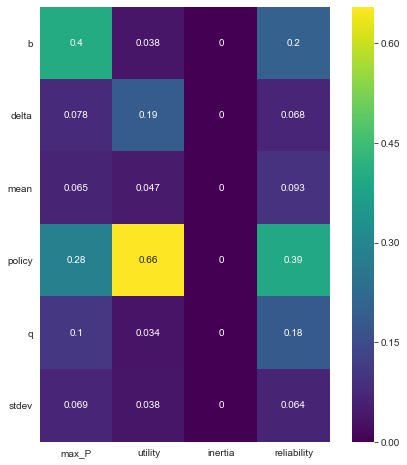

In [87]:
ax = sns.heatmap(scores_lhs, cmap='viridis', annot=True)

ax.set_aspect('equal')
fig = plt.gcf()
fig.set_size_inches(8,8)

plt.yticks(rotation=0)

plt.show()

Feature scoring indicates that Sobol sampling and LHS sampling can generate some differences